In [3]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [5]:
data =pd.read_csv("day 30 customer_acquisition_data.csv")

In [7]:
data

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


# visualizing the distribution of acquisition cost and revenue generated by the customer

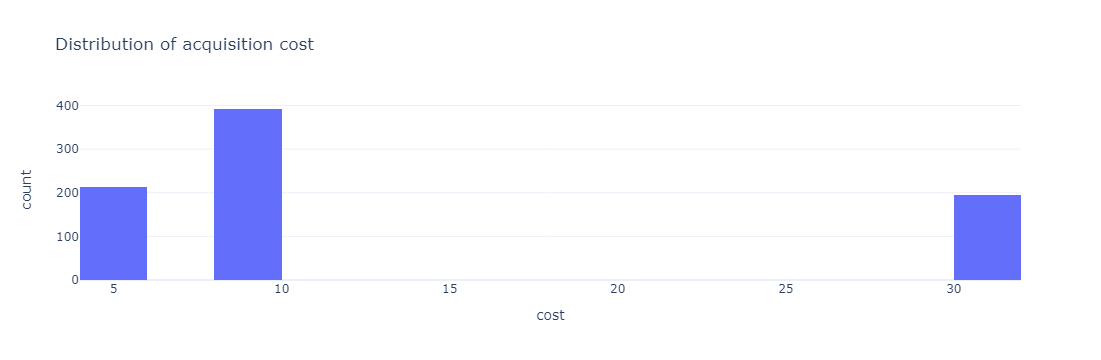

In [16]:
fig = px.histogram(data, 
                   x = "cost",
                   nbins = 20,
                   title = 'Distribution of acquisition cost')
fig.show()

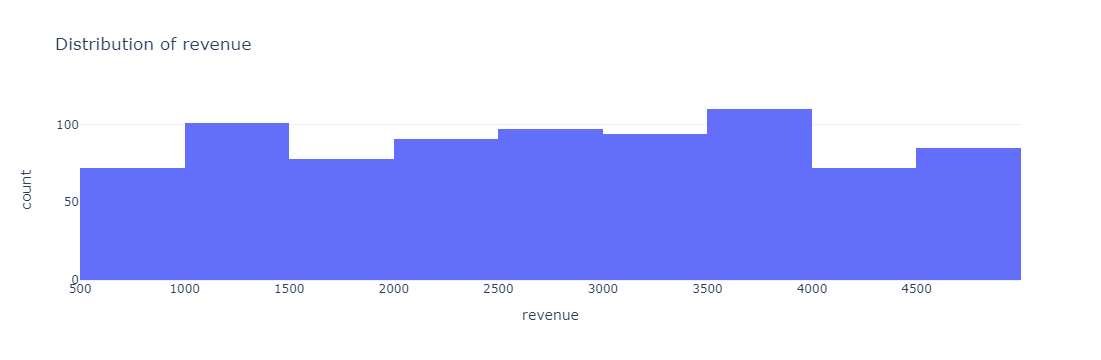

In [18]:
fig = px.histogram(data,
                   x = "revenue",
                   nbins = 20,
                   title = 'Distribution of revenue')
fig.show()

In [20]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [22]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()
cost_by_channel 

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


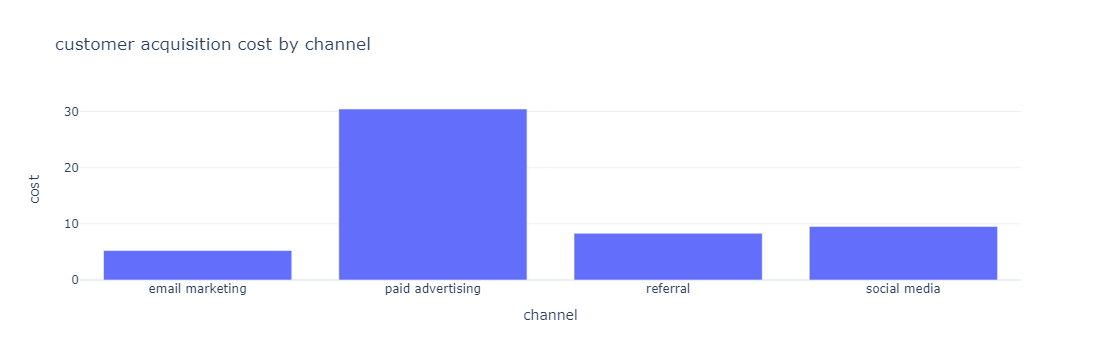

In [24]:
fig = px.bar(cost_by_channel ,
             x = "channel",
             y = "cost",
             title = "customer acquisition cost by channel")
fig.show()

In [28]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()
conversion_by_channel

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


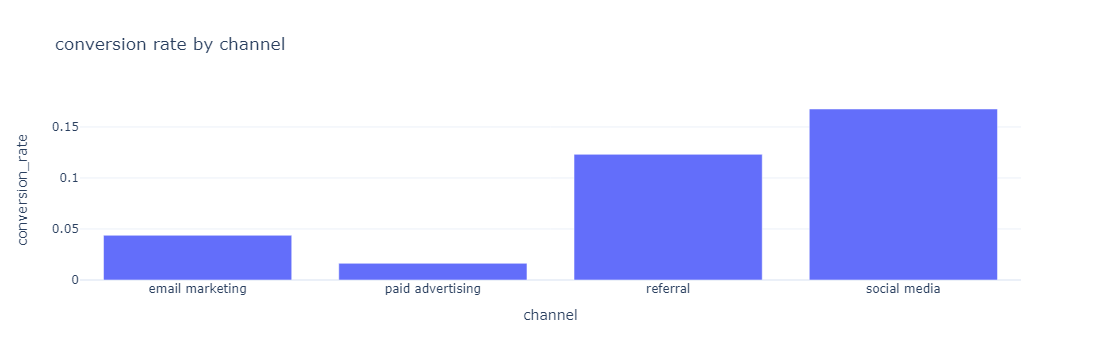

In [30]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()
fig = px.bar(conversion_by_channel,
             x = "channel",
             y = "conversion_rate",
             title = "conversion rate by channel")
fig.show()

In [32]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [34]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()
revenue_by_channel

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


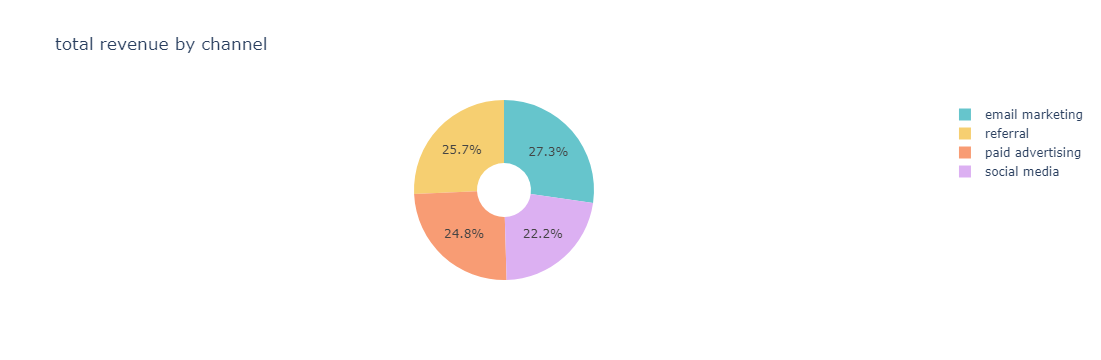

In [36]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()
fig = px.pie(revenue_by_channel,
             values = 'revenue',
             names = 'channel',
             hole = 0.3,
             title = "total revenue by channel",
             color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

In [38]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [42]:
data['ROI'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['ROI'].mean().reset_index()
roi_by_channel

,channel,ROI
0,email marketing,538.617455
1,paid advertising,92.832615
2,referral,330.691213
3,social media,278.962290


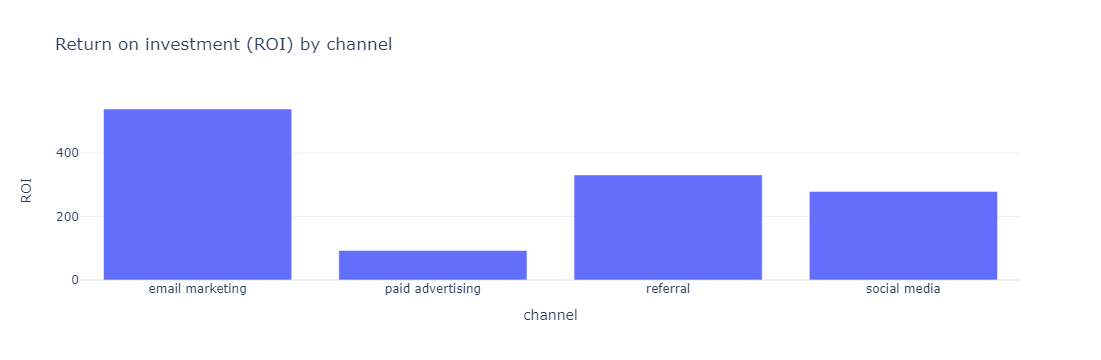

In [44]:
data['ROI'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['ROI'].mean().reset_index()
fig = px.bar(roi_by_channel,
             x = 'channel',
             y = 'ROI',
             title = "Return on investment (ROI) by channel")
fig.show()